In [69]:
#Analysis libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns
plt.style.use("ggplot")


Data check


In [70]:
#Download data
df = pd.read_csv("Clean_Dataset.csv")

In [71]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [72]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [73]:
df.shape

(300153, 12)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [75]:
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [76]:
df["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [77]:
df["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [78]:
df["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [79]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [80]:
df["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

Data preprocessing

In [81]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [82]:
df.duplicated().sum()

0

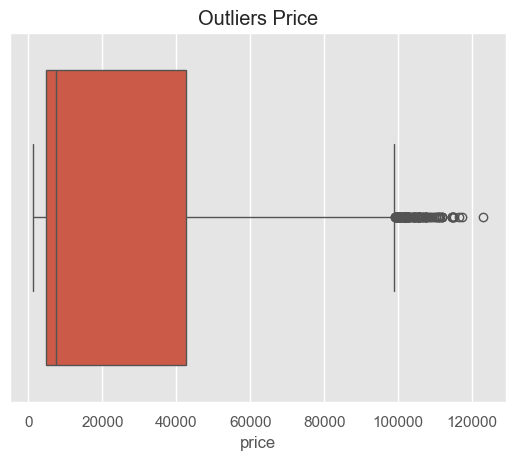

In [83]:
# to see the outliers
sns.boxplot(x=df["price"])
plt.title("Outliers Price")
plt.show()

In [84]:
# Calculate the allowed price range using IQR

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[ (df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

print("Data sebelum menghapus outliers", len(df))
print("Data setelah menghapus outliers", len(df_cleaned))


Data sebelum menghapus outliers 300153
Data setelah menghapus outliers 300030


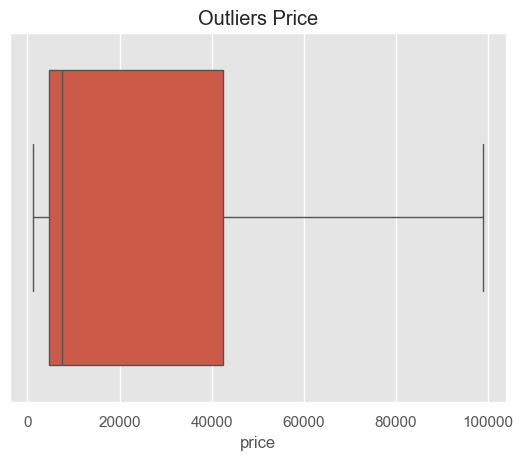

In [85]:
sns.boxplot(x=df_cleaned["price"])
plt.title("Outliers Price")
plt.show()

In [86]:
selected_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops' , 'arrival_time','destination_city','class', 'price']

df_cleaned = df_cleaned[selected_columns]

df_cleaned.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,5955


In [87]:
#Column is not important
df_cleaned = df_cleaned.drop(["flight"],axis=1)

In [88]:
df_cleaned.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'price'],
      dtype='object')

In [89]:
# Convert text values to separate binary columns using One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cleaned["airline"] = le.fit_transform(df_cleaned["airline"])
df_cleaned["source_city"] = le.fit_transform(df_cleaned["source_city"])
df_cleaned["departure_time"] = le.fit_transform(df_cleaned["departure_time"]) 
df_cleaned["stops"] = le.fit_transform(df_cleaned["stops"])
df_cleaned["arrival_time"] =  le.fit_transform(df_cleaned["arrival_time"])
df_cleaned["class"] = le.fit_transform(df_cleaned["class"])
df_cleaned["destination_city"] = le.fit_transform(df_cleaned["destination_city"]) 
 

In [90]:
df_cleaned.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,4,2,2,2,5,5,1,5953
1,4,2,1,2,4,5,1,5953
2,0,2,1,2,1,5,1,5956
3,5,2,4,2,0,5,1,5955
4,5,2,4,2,4,5,1,5955


Data Visualization

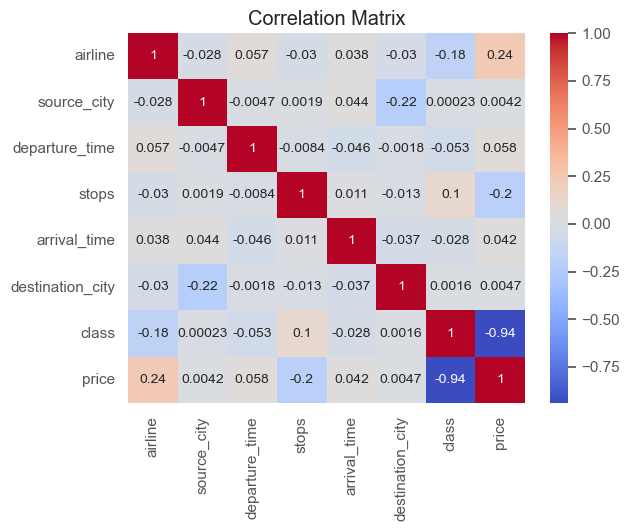

In [91]:
#To know the most important columns
sns.heatmap(df_cleaned.corr(), annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

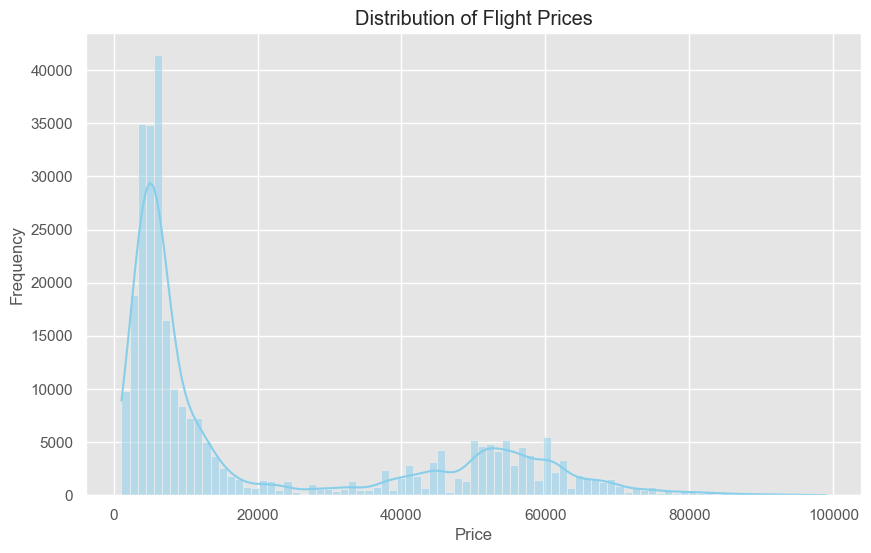

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], kde=True, color='skyblue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

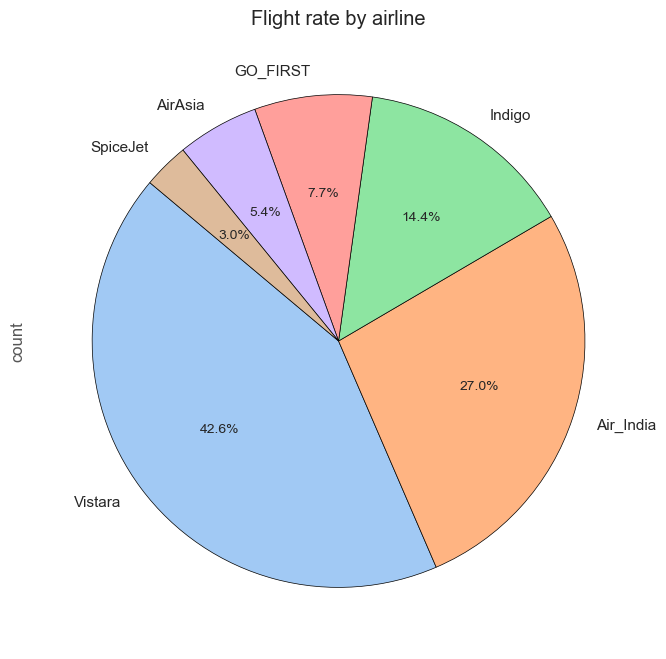

In [93]:
plt.figure(figsize=(8, 8))
df['airline'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Flight rate by airline")
plt.show()

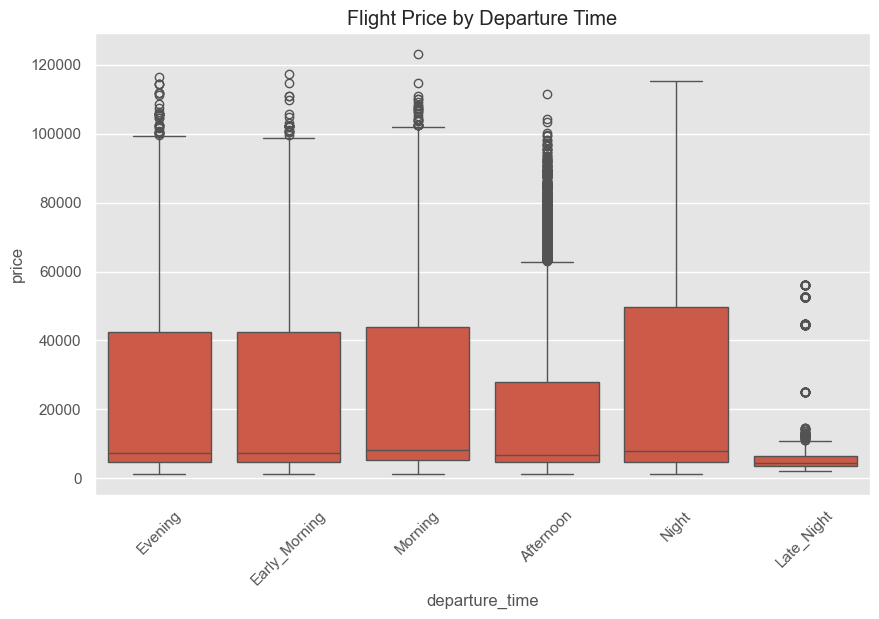

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='departure_time', y='price', data=df)
plt.title('Flight Price by Departure Time')
plt.xticks(rotation=45)
plt.show()

array([[<Axes: title={'center': 'airline'}>,
        <Axes: title={'center': 'source_city'}>,
        <Axes: title={'center': 'departure_time'}>],
       [<Axes: title={'center': 'stops'}>,
        <Axes: title={'center': 'arrival_time'}>,
        <Axes: title={'center': 'destination_city'}>],
       [<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

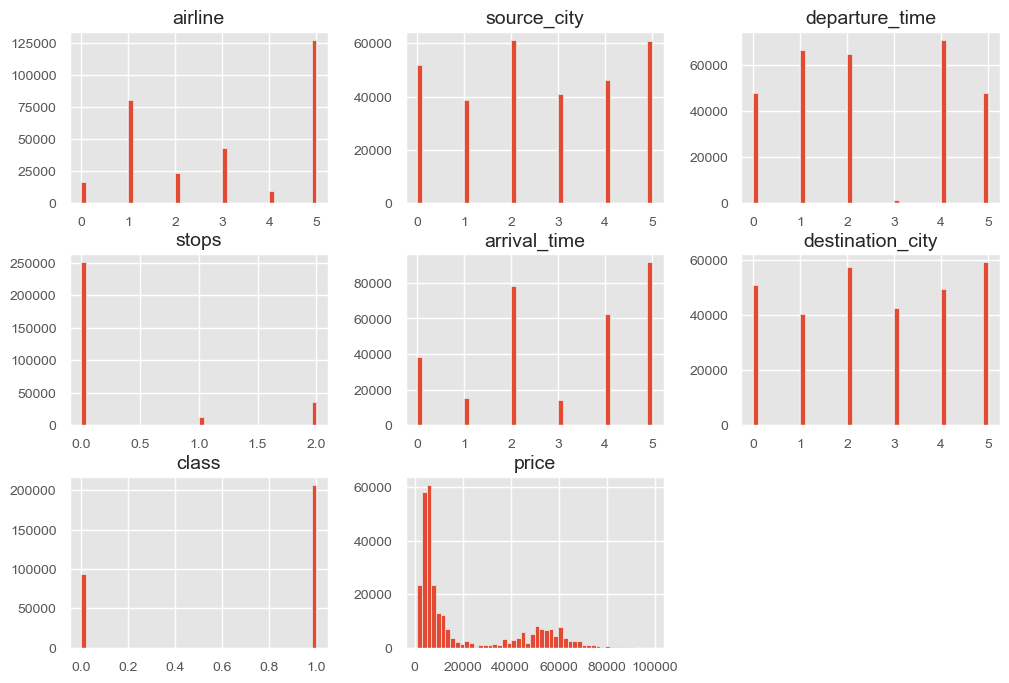

In [95]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_cleaned.hist(bins=50,figsize=(12,8))

Data Preparation

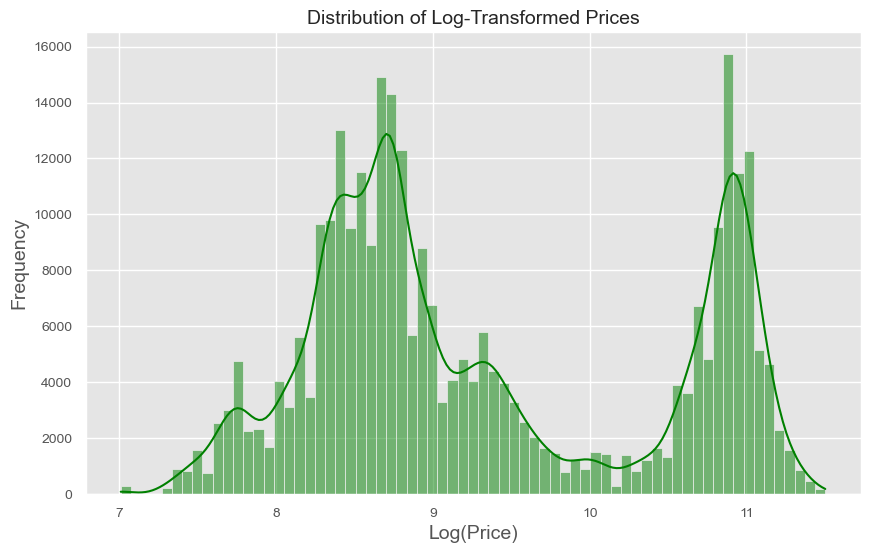

In [96]:
#The price column has a tail and we adjust it using the log

df_cleaned['price_log'] = np.log1p(df_cleaned['price'])  # log(1 + price)

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price_log'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


In [97]:
x = df_cleaned.drop(["price" , "price_log"] , axis=1)  
y = df_cleaned["price"]


In [98]:
# split the data

from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split( x, y , test_size=0.2 , random_state=42 )

In [99]:
print(y_train.describe())


count    240024.000000
mean      20880.017477
std       22651.479116
min        1105.000000
25%        4784.000000
50%        7426.000000
75%       42521.000000
max       98972.000000
Name: price, dtype: float64


In [100]:
x_train.shape

(240024, 7)

In [101]:
x_test.shape

(60006, 7)

In [102]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [103]:
#I did a scaling of the data to make it all in the same range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_x_train = scaler.fit_transform(x_train)

scale_x_test = scaler.fit_transform(x_test)


In [104]:
# We trained the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model_reg =  model.fit(scale_x_train,y_train_log)

In [105]:
y_train_log_pred = model.predict(scale_x_train)
y_train_log_pred


array([ 8.61417058,  8.82696595, 10.74537351, ...,  8.67770083,
        8.70648959,  8.63580552])

In [106]:
#Here I converted from log to integer
y_train_pred = np.expm1(y_train_log_pred)
y_train_pred

array([ 5508.17730108,  6814.57658898, 46413.79319872, ...,
        5869.53373296,  6040.99533378,  5628.66668679])

In [107]:
df_cleaned["price"]

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300030, dtype: int64

In [108]:
#Here we calculate the model error
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

 

lin_rmse = root_mean_squared_error(y_train,y_train_pred )
lin_rmse

6398.093461356797

In [109]:
from sklearn.metrics import  r2_score
r2 = r2_score(y_train,y_train_pred)
r2

0.9202170966311407

In [110]:
from sklearn.model_selection import cross_val_score
len_rems = -cross_val_score(model,x_train,y_train,scoring="neg_root_mean_squared_error",cv=10  )

In [111]:
pd.Series(len_rems).describe()

count      10.000000
mean     7199.576686
std        51.127595
min      7132.334353
25%      7162.187799
50%      7189.621221
75%      7226.698232
max      7277.329883
dtype: float64

In [ ]:
'''
Initial model uses Linear Regression. The error is relatively high,
and I'm planning to improve it using Better model for better performance.
'''

"\nInitial model uses Linear Regression. The error is relatively high,\nand I'm planning to improve it using Stochastic Gradient Descent (SGD) for better performance.\n"

Model Improvement

In [113]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [114]:
data = df.copy()

In [115]:
df = df.drop(["Unnamed: 0","flight"] , axis=1 )

In [116]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [117]:
X = df.drop(["price"],axis= 1)
Y = df["price"]

In [118]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr

upper_bound = q3 + 1.5 * iqr

df = df[ (df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

In [119]:
# split the data again

from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split( X, Y , test_size=0.2 , random_state=42 )

In [120]:
df.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [121]:
# Pipeline to prepare numeric and categorical data for modeling

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


df_num = df.select_dtypes(include= ["float64","int64"]).columns

df_cat = df.select_dtypes(include= ["object"]).columns 

encoder_pipeline = make_pipeline(

    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1),    
)

num_pipeline = make_pipeline(

    SimpleImputer(strategy="mean"),
    StandardScaler()    
)

preprocessing = ColumnTransformer([

    ("num_data", num_pipeline , ["days_left","duration"]),
    ("gat_data" , encoder_pipeline , ["airline","source_city","departure_time","stops","arrival_time","destination_city","class"])

])






In [122]:
from sklearn import set_config

set_config(display="diagram")

preprocessing

,transformers,"[('num_data', ...), ('gat_data', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [ ]:
# Perform Randomized Search to find the best hyperparameters for the Random Forest model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
randfor_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))

param_gr = {

   "randomforestregressor__max_depth" : randint(3,50),
   "randomforestregressor__n_estimators" : randint(30,500),
   "randomforestregressor__min_samples_split": randint(2 ,10),
   "randomforestregressor__min_samples_leaf" : randint(1,6),
   "randomforestregressor__max_features": [None, 'sqrt', 'log2'],
}

random_search = RandomizedSearchCV(estimator=randfor_reg,param_distributions=param_gr,n_iter=40, scoring='neg_root_mean_squared_error',cv=5,random_state=42,n_jobs=-1)

random_search.fit(x_train,y_train)


c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 661, in fit
    self._final_

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'randomforestregressor__max_depth': <scipy.stats....002511B955F10>, 'randomforestregressor__max_features': [None, 'sqrt', ...], 'randomforestregressor__min_samples_leaf': <scipy.stats....002511ADE0980>, 'randomforestregressor__min_samples_split': <scipy.stats....002511ADE2B70>, ...}"
,n_iter,40
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [143]:
random_search.best_params_

{'randomforestregressor__max_depth': 39,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__min_samples_split': 8,
 'randomforestregressor__n_estimators': 492}

In [144]:
best_rand = random_search.best_estimator_

In [148]:
y_pred = best_rand.predict(x_train)

In [ ]:
rand_rmes = root_mean_squared_error(y_train,y_pred)
rand_rmes

1990.1193109914766

In [152]:
rand_val = -cross_val_score(best_rand,x_train,y_train,scoring="neg_root_mean_squared_error",cv=10 ,n_jobs=-1 )

In [153]:
pd.Series(rand_val).describe()

count      10.000000
mean     2669.072515
std        53.825585
min      2593.788561
25%      2627.116936
50%      2673.056416
75%      2707.425202
max      2749.316318
dtype: float64

Model evaluation

In [154]:
y_pred_test = best_rand.predict(x_test)

In [157]:
rmse = root_mean_squared_error(y_test,y_pred_test)
rmse

2690.5654303051065

In [158]:
cross_val = -cross_val_score(best_rand,x_test,y_pred_test,scoring="neg_root_mean_squared_error",cv=10 ,n_jobs=-1 )

In [159]:
pd.Series(cross_val).describe()

count      10.000000
mean     1609.789845
std        37.162724
min      1555.792823
25%      1589.982467
50%      1610.882526
75%      1626.656231
max      1670.841795
dtype: float64

In [160]:
r2 = r2_score(y_test, y_pred_test)

r2

0.9859565639674985

In [ ]:
from sklearn.metrics import median_absolute_error, explained_variance_score, 

medae = median_absolute_error(y_test, y_pred_test)
evs = explained_variance_score(y_test, y_pred_test)


print(f"Median Absolute Error: {medae}")
print(f"Explained Variance Score: {evs}")


Median Absolute Error: 262.9808893004001
Explained Variance Score: 0.9859566498942129


In [ ]:
### Model Evaluation Summary
"""
The final model achieved a Root Mean Squared Error (RMSE) of approximately **1609.79** on the test set.  
Given that the average ticket price is around **20889.66**, this results in an approximate error rate of **7.7%**.

This level of accuracy is acceptable for the current scope, especially considering the complexity and noise in real-world pricing data.  
However, the model can still be further improved with more feature engineering, tuning, or advanced algorithms.
"""